## Bisection Method
The bisection method is the simplest way to solve a root from nonlinear. The idea is by using a range of root which is in $[a,b]$, we split it into two parts that we expect a root from one of a part, we call it midpoint, $c$. This can be applied using the following equation. 

$c = \frac{1} {2} (a+b)$

where $a$ and $b$ are the lower and upper boundaries respectively. There are some criteria to obtain a root using the bisection method:

1. If $f(c) = 0$, the root is $c$.
2. However, if $f(c) \ne 0$, then $f(c)$ has a positive or negative root.
3. Because $f(c) \ne 0$, the root is in one of these conditions: 
    
    3.1 $f(c) f(a) < 0$ or 
    
    3.2 $f(c) f(a) > 0$

    If the condition of 3.1 is met, then the root is in this boundary ($[a, c]$). Otherwise, the root is in the boundary of $[c, b]$

### Stopping Criteria

We set a tolerance value as $tol$ variable. Then, we estimate the number of iterations $N$ using the following equation

$N = [log_2 (\frac {b-a} {tol})]$

### Algorithm of Bisection Method

1. If the $f(a) f(b) < 0$

    1.1. Input an expected interval, $[a,b]$, and $tol$ as tolerance value (e.g. $0.001$)

    1.2. Calculate an estimation of maximum iteration, $N = [log_2 \frac {b-a} {tol}]$
    
    1.3. Calculate the midpoint of this boundary using the equation of $c = \frac{1} {2} (a+b)$
    1.4. If $f(c) f(a) < 0$, update the last boundary of $b = c$.
        
        Otherwise, if $f(c) f(a) > 0$, update the initial boundary of $a = c$.
        Otherwise, $f(c) = 0$, the root is $c$. Stop the iteration.
        
    1.5. Then, calculate again the new midpoint as point 3 for the next iteration
2. Otherwise, give the information that the root is not identified.

### Case 1
There is a function of $f(x) = x^2 - 4 = 0$. Find its root using the bisection method. Note, as we know that this function has a root of $-2$ or $2$ (two different signs). Let us try with the initial boundary guess for $a=-5$ and $b=5$.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def function(x):
    return x**2 - 4

In [19]:
def Bisection(function,a,b,tol=0.0001):
    '''
    Input:

    f: A function

    a: lower boundary

    b: upper boundary

    tol: tolarance of stoping criteria. The default is 0.0001

    Output:

    a root
    '''
    # Check the existing root
    if function(a) * function(b) < 0:
        # Calculate maximum number of iteration
        N = round(np.log2((b-a)/tol))
        print('Maximum Iteration: %d' % N)

        for i in range(N):
            # Check the midpoint
            c = (a+b)/2
            
            if (function(a) * function(c)) < 0:
                b = c
            elif (function(a) * function(c)) > 0:
                a = c
            elif function(c) == 0:
                c = c
                break
    else:
        print ('There is no root in this range. Please input a pair of intial boundary guess.')
        c = np.nan
    
    return c, function(c)

In [17]:
a = -5
b = 5
r, froot = Bisection(function,a,b)
print('The root is: %f' % r)
print('f(r): %f' % froot)

There is no root in this range. Please input a pair of intial boundary guess.
The root is: nan
f(r): nan


By using this initial boundary guess, the root is not in the range of $[-5, 5]$ because $f(a) . f(b) > 0$ (sometimes it may has a root for this condition). As mentioned above, the root of this function is $-2$ or $2$, it is solved by a simple mathematical process. If we think, it should have a root in the ranges of $[-5, 5]$, but it does not have through this boundary. Then, let us try to update one of the range, e.g. $a=-1$ and $b$ is still the same with the current value, so the update range is $[-1, 5]$

In [18]:
a = -1
b = 5
r, froot = Bisection(function,a,b)
print('The root is: %f' % r)
print('f(r): %f' % froot)

Maximum Iteration: 16
The root is: 2.000000
f(r): 0.000000


Finally, the root has been found in the positive direction, which is the root is $2$ because $f(2) = 0$ for this function. Because this function has a root in the negative direction as well, let us try to replace the boundary to $[-5, 1]$, which is more narrow to negative direction.

In [7]:
a = -5
b = 1
r, froot = Bisection(function,a,b)
print('The root is: %f' % r)
print('f(r): %f' % froot)

Maximum Iteration: 16
The root is: -2.000000
f(r): 0.000000


The root is $-2$ and the $f(2) = 0$. So, if we plot into a graph it will looks like a figure below

Text(0.5, 1.0, 'Bisection Method')

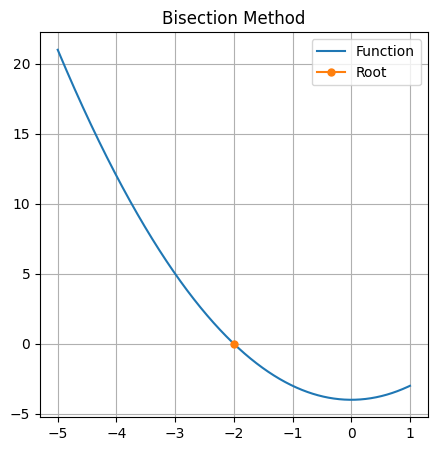

In [8]:
x = np.linspace(a,b,1000)
fx = function(x)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,fx, label='Function')
ax.plot(r,froot, marker='.', markersize=10, label='Root')
ax.set_axisbelow(True)
plt.grid()
plt.legend()
plt.title('Bisection Method')


From this case, we can conclude that the presence of root tends to one direction (positive or negative). If we set the initial boundary too wide, it could be hard to find the root.

### Case 2

There is a function of $f(x) = x^2 + 4x + 4 = 0$. Find its root!.

In [9]:
def function2(x):
    return x**2 + 4*x + 4

Let us try with the narrow initial guess boundaries, which are $a=-5$ and $b=1$. In fact, by using the analytical method, the function of $f(x) = x^2 + 4x + 4 = (x + 2)^2$ has the double roots of $-2$ with the same sign. Hence, we expect the root lies in this range because the $-2$ in this interval.

In [15]:
a = -5
b = 1
r2, froot2 = Bisection(function2,a,b)
print('The root is: %f' % r2)
print('f(r): %f' % froot2)

There is no root in this range. Please input a pair of intial boundary guess.
The root is: nan
f(r): nan


Unfortunately, the root is not found. In this case, we can conclude that the bisection method is not capable of finding a root from a function that has double roots. The solution is, that we can use another numerical method to find the root.